In [57]:
# immporting necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [58]:
# loading the housing dataset

df=pd.read_csv('C:\\Users\\ROOPKATHA\\Documents\\CV prep\\House Price Prediction\\Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Exploring the dataset (EDA)

In [59]:
df.shape

(545, 13)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [61]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [62]:
df.isnull().sum()

# no null values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [26]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


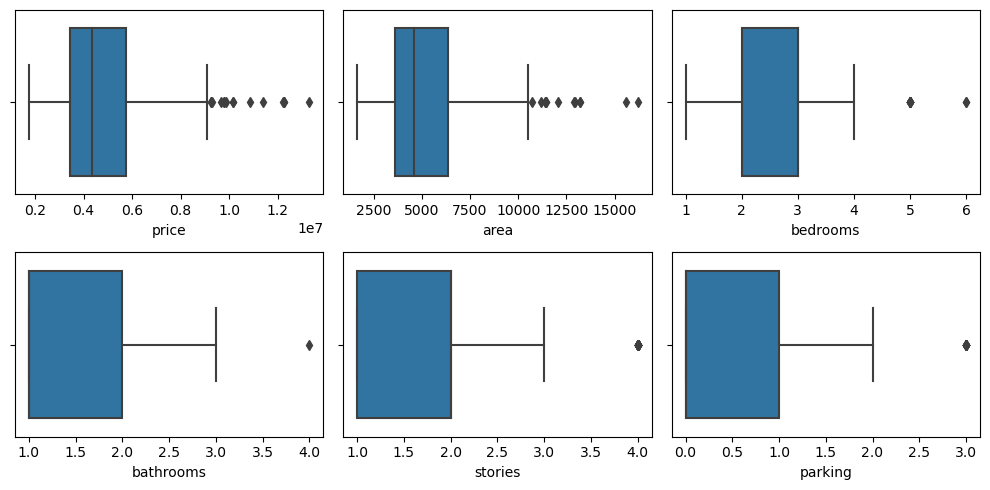

In [27]:
# checking for outliers

fig, axs = plt.subplots(2,3, figsize = (10,5))
a = sns.boxplot(data=df,x='price', ax = axs[0,0])
b = sns.boxplot(data=df,x='area', ax = axs[0,1])
c = sns.boxplot(data=df,x='bedrooms', ax = axs[0,2])
d = sns.boxplot(data=df,x='bathrooms', ax = axs[1,0])
e = sns.boxplot(data=df,x='stories', ax = axs[1,1])
f = sns.boxplot(data=df,x='parking', ax = axs[1,2])

plt.tight_layout()

In [28]:
'''
since Price and Area have considerable amount of outliers, we can check
if it is possible to remove them because otherwise the presence of the outliers
can skew the interpretation of our analysis to a large extent.

if the number of outliers in these 2 features are less than 5% of the entire
dataset, we will remove these outliers since we would still have enough data points
to work with.
'''

'\nsince Price and Area have considerable amount of outliers, we can check\nif it is possible to remove them because otherwise the presence of the outliers\ncan skew the interpretation of our analysis to a large extent.\n\nif the number of outliers in these 2 features are less than 5% of the entire\ndataset, we will remove these outliers since we would still have enough data points\nto work with.\n'

In [29]:
# checking if number of outliers are less than 5% of the entire dataset.

# to find the outliers we have to calculate the IQR of these 2 features.

# for Price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_price = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Calculating the percentage of Price outliers 
percentage_of_outliers_price = len(outliers_price) / df.shape[0] * 100


# for Area
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_area = df[(df['area'] < lower_bound) | (df['area'] > upper_bound)]

# Calculating the percentage of Area outliers 
percentage_of_outliers_area = len(outliers_area) / df.shape[0] * 100

print(f'price outliers % is {percentage_of_outliers_price:.2f}%')
print(f'area outliers % - {percentage_of_outliers_area:.2f}%')

# since in both the cases, the %is less than 5%, we can remove the outliers.

price outliers % is 2.75%
area outliers % - 2.20%


In [30]:
# Removing the outliers

# Price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df= df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Area
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['area'] >= lower_bound) & (df['area'] <= upper_bound)]
df.shape

(517, 13)

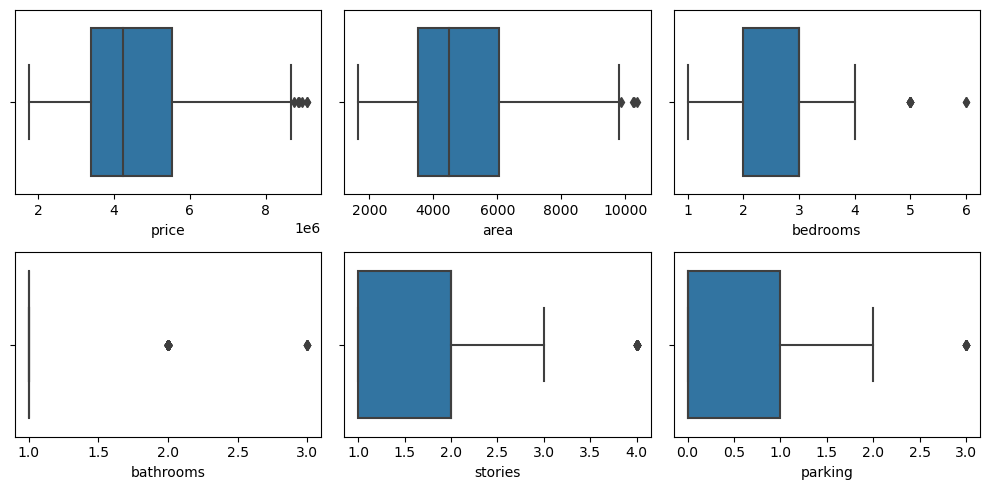

In [31]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
a = sns.boxplot(data=df,x='price', ax = axs[0,0])
b = sns.boxplot(data=df,x='area', ax = axs[0,1])
c = sns.boxplot(data=df,x='bedrooms', ax = axs[0,2])
d = sns.boxplot(data=df,x='bathrooms', ax = axs[1,0])
e = sns.boxplot(data=df,x='stories', ax = axs[1,1])
f = sns.boxplot(data=df,x='parking', ax = axs[1,2])

plt.tight_layout()

In [32]:
# the outliers are removed successfully.

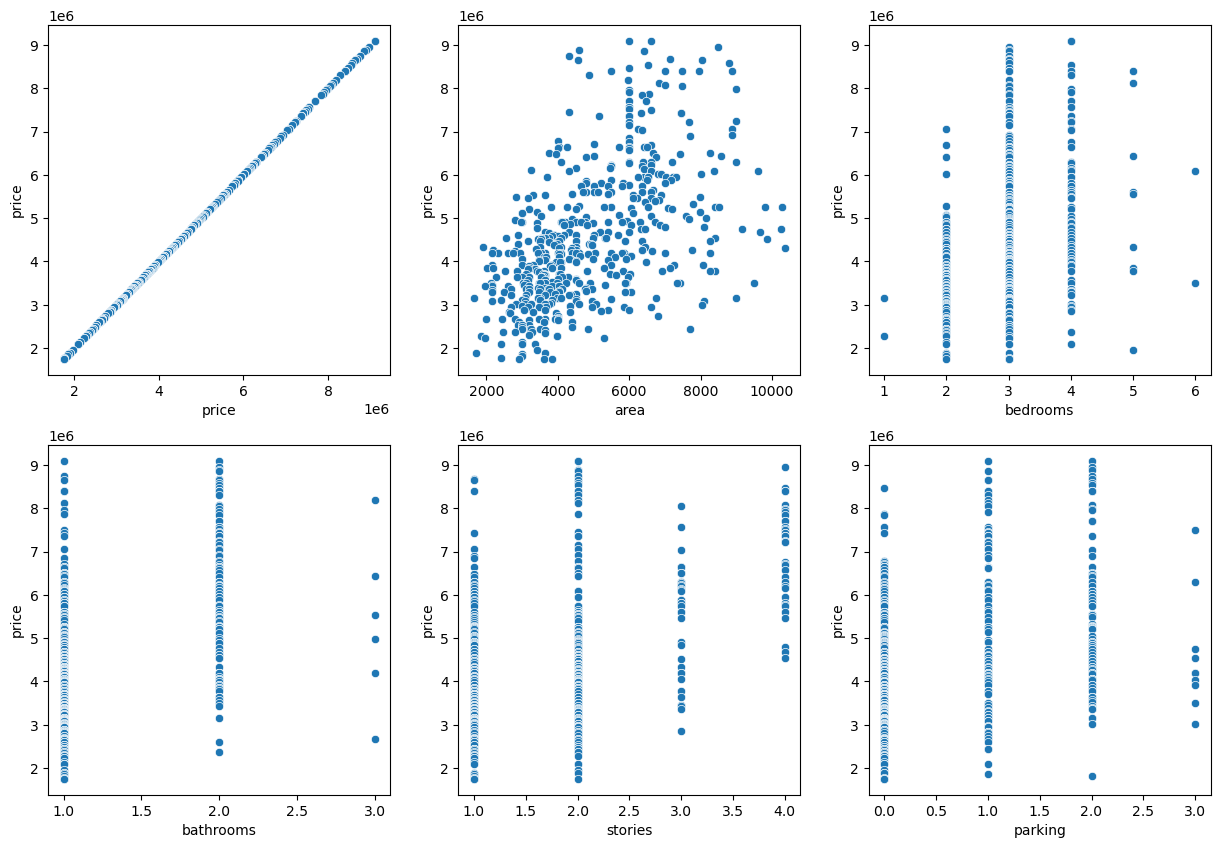

In [33]:
# now for the numeric variables, we can visualize if and how they are affecting our dependent variable Price.

fig, axs = plt.subplots(2,3, figsize = (15,10))

a = sns.scatterplot(data=df,x='price',y='price', ax = axs[0,0])
b = sns.scatterplot(data=df,x='area',y='price', ax = axs[0,1])
c = sns.scatterplot(data=df,x='bedrooms',y='price', ax = axs[0,2])
d = sns.scatterplot(data=df,x='bathrooms',y='price', ax = axs[1,0])
e = sns.scatterplot(data=df,x='stories',y='price', ax = axs[1,1])
f = sns.scatterplot(data=df,x='parking',y='price', ax = axs[1,2])

# there is some form of relation between price but the relation isn't very clear.

In [34]:
# Calculating the Pearson correlation between 'price' and 'area'
correlation_area = df['price'].corr(df['area'])

# Calculating the Pearson correlation between 'price' and 'bedrooms'
correlation_bedrooms = df['price'].corr(df['bedrooms'])

# Calculating the Pearson correlation between 'price' and 'bathrooms'
correlation_bathrooms = df['price'].corr(df['bathrooms'])

# Calculating the Pearson correlation between 'price' and 'stories'
correlation_stories = df['price'].corr(df['stories'])

# Calculating the Pearson correlation between 'price' and 'parking'
correlation_parking = df['price'].corr(df['parking'])

print(f"Correlation between price and area: {correlation_area}")
print(f"Correlation between price and bedrooms: {correlation_bedrooms}")
print(f"Correlation between price and bathrooms: {correlation_bathrooms}")
print(f"Correlation between price and stories: {correlation_stories}")
print(f"Correlation between price and parking: {correlation_parking}")


Correlation between price and area: 0.5331856394712841
Correlation between price and bedrooms: 0.33532836472470373
Correlation between price and bathrooms: 0.46648266722619525
Correlation between price and stories: 0.44683918425499136
Correlation between price and parking: 0.3210577451977481


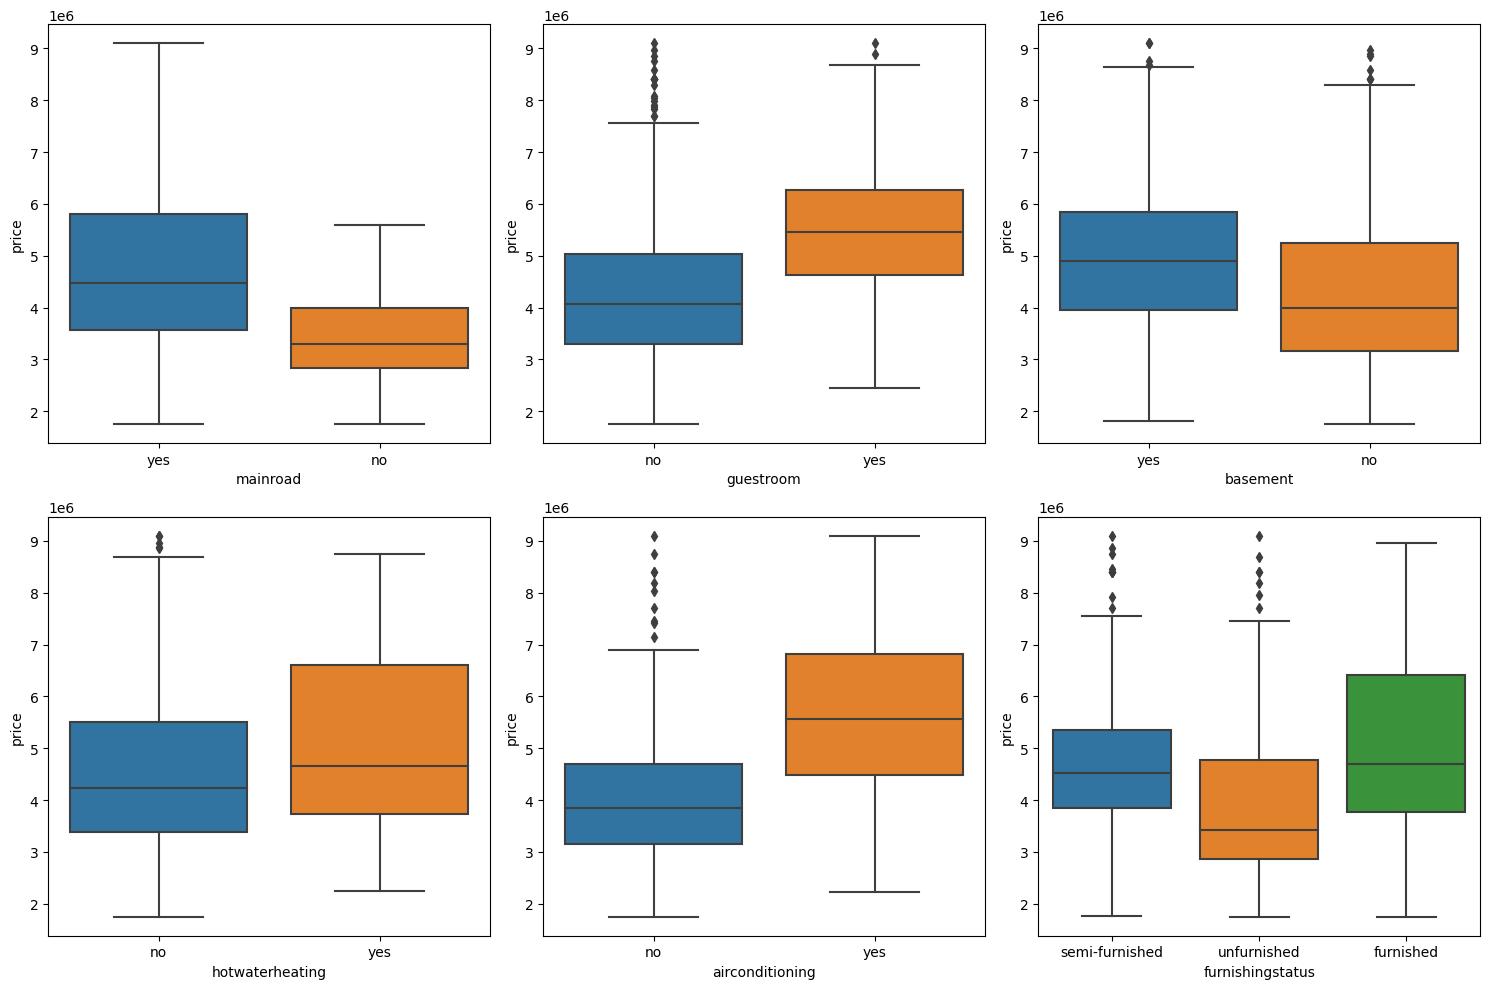

In [35]:
# now for the categorical variables, we cam visualize if and how they are affecting our dependent variable Price.

fig, axs = plt.subplots(2,3, figsize = (15,10))

a = sns.boxplot(data=df,x='mainroad',y='price', ax = axs[0,0])
b = sns.boxplot(data=df,x='guestroom',y='price', ax = axs[0,1])
c = sns.boxplot(data=df,x='basement',y='price', ax = axs[0,2])
d = sns.boxplot(data=df,x='hotwaterheating',y='price', ax = axs[1,0])
e = sns.boxplot(data=df,x='airconditioning',y='price', ax = axs[1,1])
f = sns.boxplot(data=df,x='furnishingstatus',y='price', ax = axs[1,2])

plt.tight_layout()

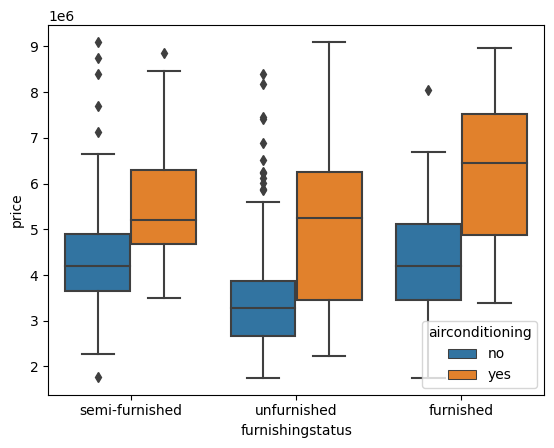

In [36]:
# We can also visualise some of these categorical features parallely by using the hue argument.
# example - how furnishingstatus will affect housing price with airconditioning as the hue.

sns.boxplot(data=df,x='furnishingstatus',y='price', hue = 'airconditioning')
plt.show()

To build the linear regression model we first have to prepare the data
1) Transforming the Categorical variables to dummy variables
2) scaling the numeric variables to bring them into a comparable scale.

In [37]:
# Transformation of the categorical variables into Dummy variables

categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,2,1,0,1,0,0,0,1,0
16,9100000,6600,4,2,2,1,1,1,1,0,1,1,0,1
17,8960000,8500,3,2,4,2,1,0,0,0,1,0,0,0
18,8890000,4600,3,2,2,2,1,1,0,0,1,0,0,0
19,8855000,6420,3,2,2,1,1,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [38]:
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,2,1,0,1,0,0,0,1,0
16,9100000,6600,4,2,2,1,1,1,1,0,1,1,0,1
17,8960000,8500,3,2,4,2,1,0,0,0,1,0,0,0
18,8890000,4600,3,2,2,2,1,1,0,0,1,0,0,0
19,8855000,6420,3,2,2,1,1,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [39]:
# Rescaling the numeric features
# we will use the Min-Max scaling process for this due to the presence of categorical variables in the dataset.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numeric_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,1.000000,0.499426,0.6,0.0,0.333333,0.666667,1,0,1,0,0,0,1,0
16,1.000000,0.568312,0.6,0.5,0.333333,0.333333,1,1,1,0,1,1,0,1
17,0.980952,0.786452,0.4,0.5,1.000000,0.666667,1,0,0,0,1,0,0,0
18,0.971429,0.338691,0.4,0.5,0.333333,0.666667,1,1,0,0,1,0,0,0
19,0.966667,0.547646,0.4,0.5,0.333333,0.333333,1,0,0,0,1,1,1,0


In [40]:
# defining the independent variables set and the dependent variable column.

X = df.drop('price',axis = 1)
Y = df['price']

In [41]:
X.head().shape

(5, 13)

In [42]:
Y.head()

15    1.000000
16    1.000000
17    0.980952
18    0.971429
19    0.966667
Name: price, dtype: float64

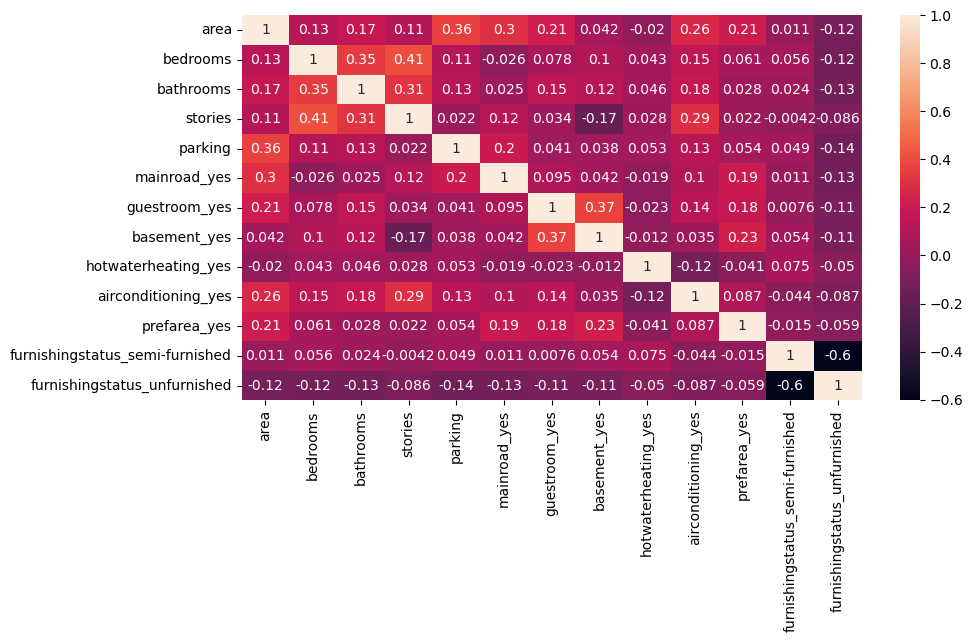

In [43]:
# feature selection
# there can be features in the dataset which are highly correleated
# we need to remove these features to avoid the problem of multicollinearity.

# checking the correlation between the features at the feature set

plt.figure(figsize = (10,5) )
cor = X.corr()
sns.heatmap(cor,annot=True)
plt.show()


In [44]:
# we will define a function now from which we will be able to select the highly correlated featres
# it will give us the first feature that is correlated with any other feature
# then we will remove those related features from our feature set.


def correlation(dataset,threshold):# threshold is the correlation value above which the elimination would start
    corr_cols = set()
    corr_matrix = dataset.corr()
    for i in range(len(dataset.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                corr_cols.add(corr_matrix.columns[i])
    return corr_cols

correlation(X,0.25) # for this model I want to remove one of those features which have a correlation more than 25%.

{'airconditioning_yes',
 'basement_yes',
 'bathrooms',
 'furnishingstatus_unfurnished',
 'mainroad_yes',
 'parking',
 'stories'}

In [45]:
# dropping these features from the feature set, we get -->

X = X.drop(list(correlation(X,0.25)), axis = 1)
X.head()

,area,bedrooms,guestroom_yes,hotwaterheating_yes,prefarea_yes,furnishingstatus_semi-furnished
15,0.499426,0.6,0,0,0,1
16,0.568312,0.6,1,0,1,0
17,0.786452,0.4,0,0,0,0
18,0.338691,0.4,1,0,0,0
19,0.547646,0.4,0,0,1,1


In [46]:
# splitting the dataset into training and test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [47]:
# building the linear regression model

import statsmodels.api as sm 

# running the OlS estimator to build our model - 
lm = sm.OLS(Y_train,X_train).fit()

# summary statistic of our model
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.856
Model:                            OLS   Adj. R-squared (uncentered):              0.854
Method:                 Least Squares   F-statistic:                              352.7
Date:                Tue, 07 Nov 2023   Prob (F-statistic):                   3.13e-146
Time:                        21:32:39   Log-Likelihood:                          134.23
No. Observations:                 361   AIC:                                     -256.5
Df Residuals:                     355   BIC:                                     -233.1
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [48]:
# checking for multicollinearity in our model using the Variance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

# since all the values are less than 10, we can say our model doesn't have the problem of multicollinearity.

,Features,VIF
0,area,3.88
1,bedrooms,4.01
2,guestroom_yes,1.30
3,hotwaterheating_yes,1.06
4,prefarea_yes,1.33
5,furnishingstatus_semi-furnished,1.63


In [49]:
# Model Evaluation on the test dataset

Y_predicted = lm.predict(X_test)

In [50]:
from sklearn.metrics import r2_score 
r2_score(Y_test, Y_predicted)

0.4647067556404415

In [51]:
# Residual Analysis of the test data

residual = (Y_test-Y_predicted)

Text(0.5, 0, 'Errors')

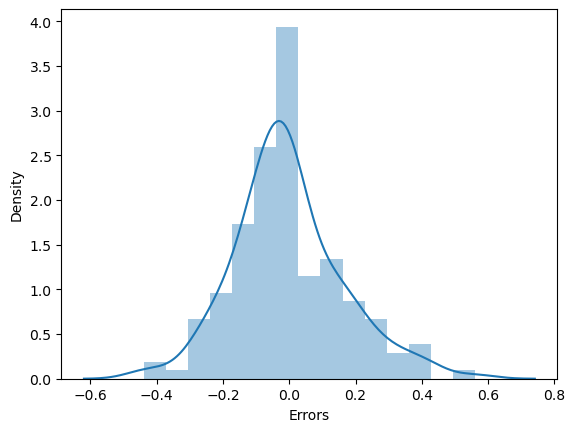

In [52]:
# Plotting the histogram of the error terms to see if these are normally distributed or not

sns.distplot(residual)
plt.xlabel('Errors')

# we can see that the errors are distributed normally (roughly).

In [56]:
from scipy import stats
jb_stat, jb_p_value = stats.jarque_bera(residual)
jb_p_value

# The residuals are not normally distributed (reject H0)

0.0036183001777937577

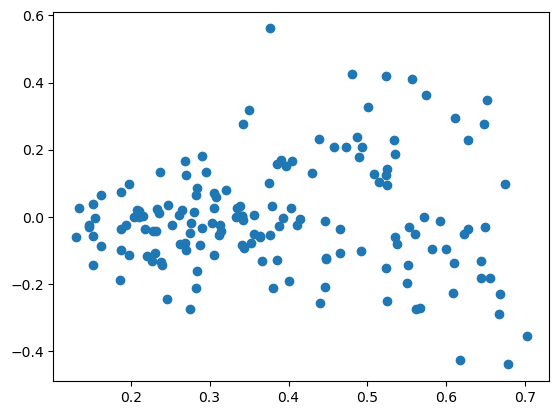

In [169]:
# we can also check if the residuals are correlated with the dependent variable or not --

plt.scatter(Y_predicted,residual)
plt.show()

# the residuals do not have any relation with the predicted values of the dependent variable.

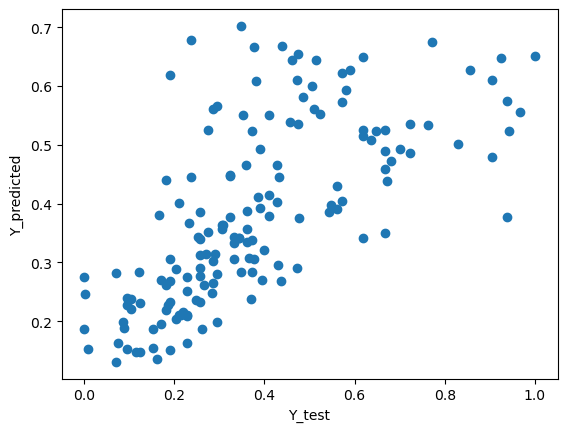

In [170]:
# Finally, plotting y_test and y_pred to understand the spread.

plt.scatter(Y_test,Y_predicted)
plt.xlabel('Y_test')
plt.ylabel('Y_predicted')  
plt.show()

# it shows a more or less positive relation between the actual and predicted values of Y.

So, the equation of our best fitted line is:

price = 0.4907(area)+ 0.3793(bedrooms)+ 0.0614(guestroom_yes)+ 0.0631(hotwaterheating_yes) +0.0835(prefarea_yes)+                       0.0520(furnishingstatus_semi-furnished)                  
                           
                     
                          
